In [1]:
import pandas as pd
import sklearn 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("E:/bank.csv")
data.head(-20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,720608658,Existing Customer,33,F,1,Uneducated,Single,Less than $40K,Blue,36,...,8398.0,1875,6523.0,0.727,16706,123,0.757,0.223,0.000292,0.999710
10103,717185658,Attrited Customer,51,M,1,High School,Married,$80K - $120K,Blue,36,...,22754.0,0,22754.0,0.799,8531,77,0.791,0.000,0.997880,0.002118
10104,715474083,Existing Customer,51,M,3,Graduate,Single,$60K - $80K,Silver,36,...,29663.0,1743,27920.0,0.667,14638,93,0.722,0.059,0.000107,0.999890
10105,709646433,Attrited Customer,59,F,1,High School,Married,Less than $40K,Blue,50,...,5043.0,743,4300.0,0.805,10170,66,0.784,0.147,0.997010,0.002988


In [3]:
data=data.rename(columns={'Attrition_Flag':'flag','Customer_Age':'age',})
data.head()

,CLIENTNUM,flag,age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data.isnull().sum()

CLIENTNUM                                                                                                                             0
flag                                                                                                                                  0
age                                                                                                                                   0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [5]:
data=data.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],1)

In [6]:
data.shape

(10127, 21)

In [7]:
data=data.replace(to_replace='Existing Customer',value=0)
data=data.replace(to_replace='Attrited Customer',value=1)
data=data.replace(to_replace=['M','F'],value=[1,0])
data=data.replace(to_replace=['High School', 'Graduate', 'Uneducated', 'Unknown', 'College','Post-Graduate','Doctorate'],value=[0,1,2,3,4,5,6])
data=data.replace(to_replace=['Married', 'Single', 3, 'Divorced'],value=[0,1,2,3])
data=data.replace(to_replace=['Blue', 'Gold', 'Silver', 'Platinum'],value=[0,1,2,3])
data=data.replace(to_replace=['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K','$120K +', 2],value=[0,1,2,3,4,5])
data

,CLIENTNUM,flag,age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,5,0,0,0,0,39,...,1,5,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,1,1,1,0,44,...,1,5,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,5,1,0,2,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,0,5,1,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,5,5,0,0,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,5,1,1,3,0,40,...,5,5,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,5,5,3,3,0,25,...,5,5,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,0,0,1,0,36,...,5,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,5,1,5,3,0,36,...,5,5,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income_Category', ylabel='count'>

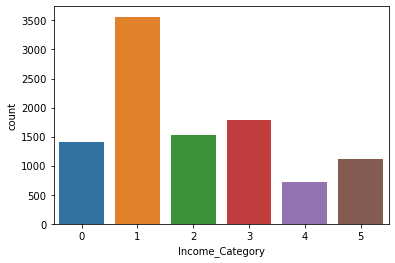

In [8]:
sns.countplot(data["Income_Category"])

In [9]:
data

,CLIENTNUM,flag,age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,5,0,0,0,0,39,...,1,5,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,1,1,1,0,44,...,1,5,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,5,1,0,2,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,0,5,1,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,5,5,0,0,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,5,1,1,3,0,40,...,5,5,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,5,5,3,3,0,25,...,5,5,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,0,0,1,0,36,...,5,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,5,1,5,3,0,36,...,5,5,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<AxesSubplot:>

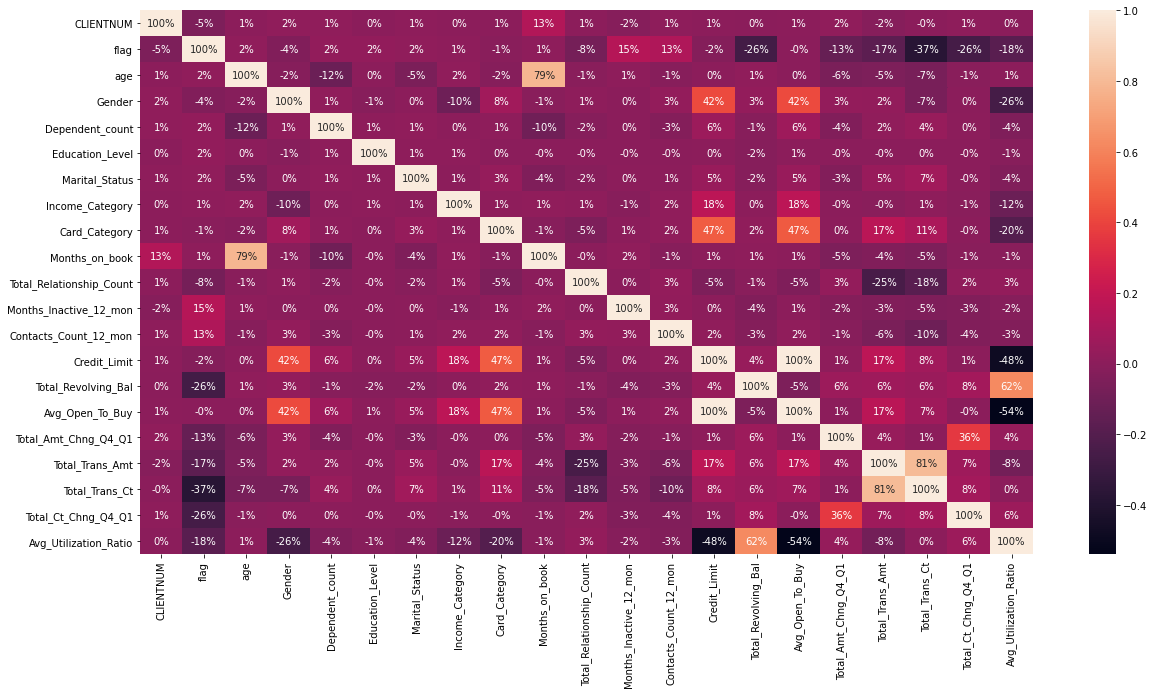

In [10]:
df=data.corr()
plt.figure(figsize=[20,10])
sns.heatmap(df,annot=True,fmt='.0%')


In [11]:
x=list(zip(data["Months_Inactive_12_mon"],data["Contacts_Count_12_mon"],data["Total_Revolving_Bal"],data["Total_Amt_Chng_Q4_Q1"],data["Total_Trans_Amt"],data["Total_Trans_Ct"],data["Total_Ct_Chng_Q4_Q1"],data["Avg_Utilization_Ratio"]))
y=list(data["flag"])
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.1)

0.9151036525172754


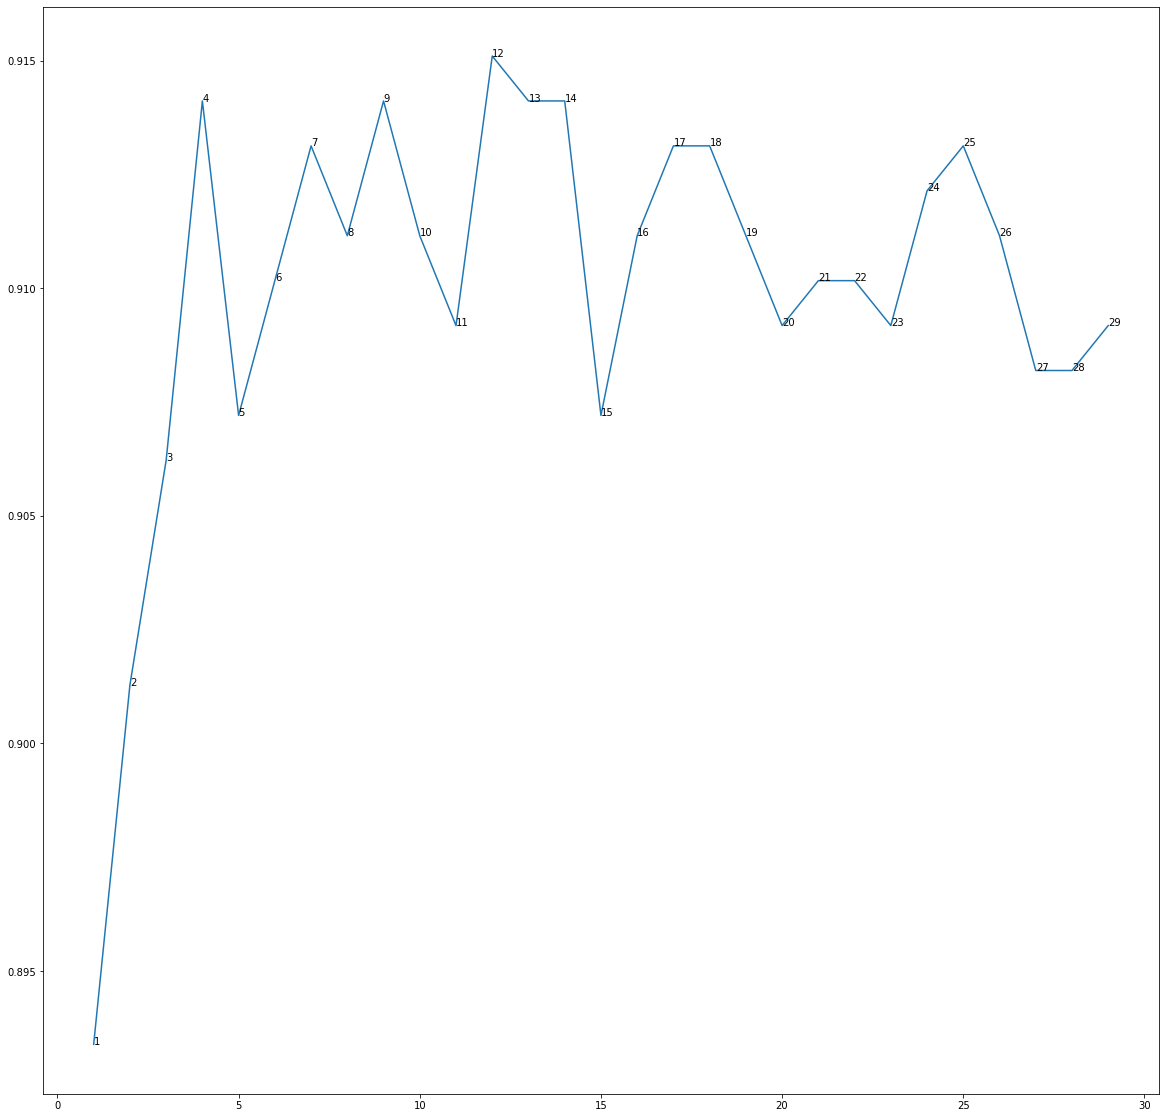

In [12]:
scores=[]
for i in range(1,30):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    acc=model.score(x_test,y_test)
    scores.append(acc)
plt.figure(figsize=[20,20])
plt.plot([k for k in range(1,30)],scores)
for i in range(1,30):
    plt.annotate(i,xy=(i,scores[i-1]))
print(max(scores))

In [13]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
acc=model.score(x_test,y_test)
print(acc*100)

90.72063178677196


In [18]:
pred=model.predict(x_test[:20])
print(pred)
print(y_test[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
